In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [23]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'imagedata/training',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'imagedata/validation',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

train_ds

Found 31 files belonging to 2 classes.


Found 31 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [81]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │    31,490,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,517,889 (120.23 MB)

 Trainable params: 31,517,889 (120.23 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [83]:
history=model.fit(train_ds,epochs=20,validation_data=validation_ds)
history

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5484 - loss: 0.7153 - val_accuracy: 0.5161 - val_loss: 1.4304
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5806 - loss: 2.2571 - val_accuracy: 0.5161 - val_loss: 18.3862
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5161 - loss: 19.6402 - val_accuracy: 0.5161 - val_loss: 5.9477
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5161 - loss: 5.5683 - val_accuracy: 0.4839 - val_loss: 2.9546
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5484 - loss: 2.4212 - val_accuracy: 0.4839 - val_loss: 3.4617
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4839 - loss: 3.6867 - val_accuracy: 0.6774 - val_loss: 0.4829
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7419 - loss: 0.6217 - val_accuracy: 0.5161 - val_loss: 1.7020
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5484 - loss: 1.3465 - val_accuracy: 0.5161 - val_loss: 0.9007
Epoch 9/20
1/1

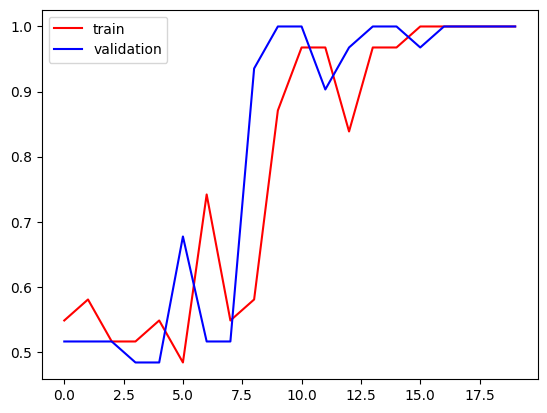

In [84]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [102]:
model.save("D:\python programs\All\.venv\Include\Temp\device-classification.keras")

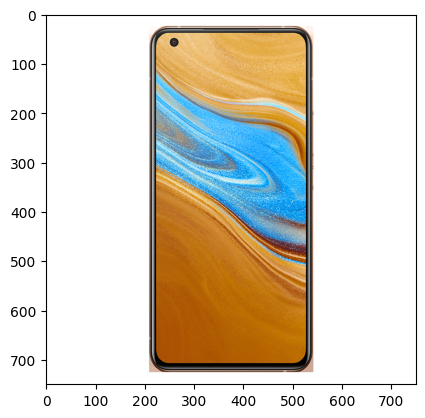

In [85]:
import cv2

test_i=cv2.imread('imagedata/testing/2.png')
plt.imshow(test_i)

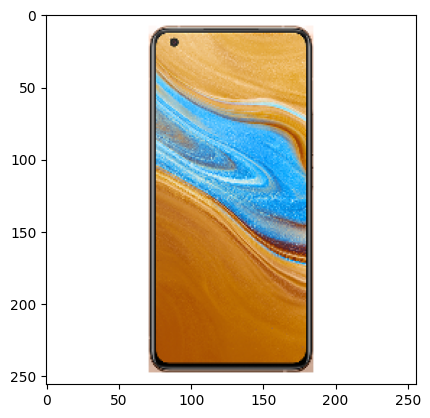

In [86]:
test_i.shape
test_i=cv2.resize(test_i,(256,256))
test_input = test_i.reshape((1,256,256,3))

plt.imshow(test_i)

In [97]:
import cv2
import numpy as np

def image_predict(path):
    test_i=cv2.imread(path)
    plt.imshow(test_i)

    test_i.shape
    test_i=cv2.resize(test_i,(256,256))
    test_input = test_i.reshape((1,256,256,3))

    arr = np.array(model.predict(test_input))
    value = arr[0, 0]
    if value == 0:
        print("Laptop")
    else:
        print("Mobile")  
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Mobile


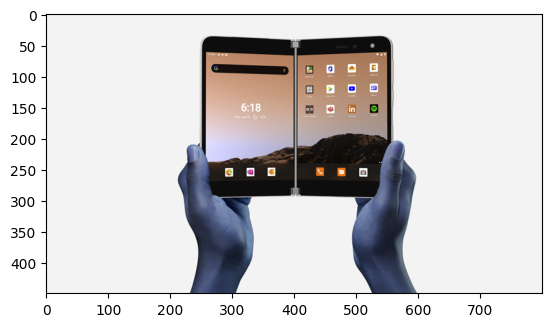

In [100]:
image_predict('imagedata/testing/4.png')